# Classifying whether an individual is likely to make more or less than 50K per year

The goal of this problem is for you to try and classify whether or not an individual is likely to make more or less than 50K per year.  Carry out this task.  Try at least five machine algorithms, report precision, recall and f1 score on a test set.

For each of the parts, report your preformance in terms not of just numbers but in terms of graphs. When you have training and validation data, please show the curves as the training progresses. You should know when you are overfitting or underfitting. Don't just report bare numbers. **You are free to add implmentation or markdown cells to make your notebook clearer!!**

## Data:

The following dataset was taken from the first dataset repository: http://archive.ics.uci.edu/ml/datasets/Adult

As the original task of the dataset lays out, 
Please note:
* the continuous variable fnlwgt represents final weight, which is the number of units in the target population that the responding unit represents.

## Part 1: Dealing with Missing Values

What should you do about dealing with missing values - do you just drop those rows?

One of the most common problems we come accross in working with data "in the wild" is missing data. Often we will have observations (rows) that have only some of the needed attributes. Different rows will have different attributes missing. There are a number of strategies for dealing with the missing values. Clearly one could be dropping the column (attribute), or row (observation). Unfortuntely if you drop columns you may lose critical information that is helpful for classification and may be present in most (many) of the rows. You can drop rows but if many rows have at least one missing value, you may loose too much data. Do you try to impute (i. e. fill in) the missing data?  If so how?  

Explain why you chose the strategy you did.

*Hint - '?' denotes a missing value.*

### Some possible strategies for dealing with missing data

1. Whenever there is pleanty of data and very little missing data, you should consider dropping rows and/or columns. This may introduce some bias in the data but again, if the problem is limited to a very few rows or columns, it is easy in training to reproduce.

2. Fill with fixed value using sklearn.impute.SimpleImputer.
    a. 'constant' 0. Rarely a good idea but sometimes, if we can assume that when it is missing it is basically 0, this might be a good idea. For example a data may list number of house fires in a zip code and a missing value just means none.
    b. 'mean' if the data is numeric, the mean is meaningfull.
    c. 'median' may be more sensible if the data is integer or ordered. When the mean and median are very different it is important to understand what a "typical" example might mean. When considering "income", for example, a few large outliers will mess up the mean.
    d. "most_frequent' when you have categorical (nominal) labels, mean and median don't make any sense. Most probable label is what you need to use. This is also known as "mode".

3. sklearn.impute.MissingIndicator: Sometimes the fact that a value is missing, is itself an important indicator. One can create a new feature/attribute that indicates a certain attribute is missing. If you later build a classifier by hand you can explicitly wieght each variable using the missing variable weights so that for that example (row) that attribute won't contribute to the classifier. In a deep neural network it is possible that the network can learn to do that automatically.

4. One can use the sklearn.impute.KNNImputer which will look for rows to fill in the data.

5. Fill with sklearn.impute.IterativeImputer scikit-learn provides a sophisticated imputation strategy. You can read up on this in the documentation, but it will fix on of the columns (attributes), and try to use the other features to predict similar to KNN but more sophisticated.

6. Train a classifier: You can build your own classifier using machine learning. This is kind of a problem within a problem but if done correctly, it has the potential to be more accurate than a simpler method. Of course, if done badly it could be worse.

7. Manually impute the missing values. You may know enough about the problem to build an ad-hoc way to fill in the missing values for each column in a way that makes the most sense. This almost always requires a great deal of domain expertise. 



In [27]:
# Add your code for filling in the data here. Please end by using the appropriate method for data filling.
# to show the amount of missing data (which in the end should not be any since you dropped or filled in data)


import pandas as pd

columns = [
    "age",
    "work_class",
    "fnlwgt",
    "education",
    "education_num",
    "marital_status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital_gain",
    "capital_loss",
    "hours_per_week",
    "native_country",
    "target"
]
df = pd.read_csv("adult.data", names=columns)
for column in df.columns:
    if df[column].dtype == "object":
        df[column] = df[column].str.strip()

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [30]:
df_1 = None
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [34]:
Target = df.target

In [38]:
df_1 = df.drop('target', axis=1)

In [39]:
#df.age[df. == 30].count()

## Part 2: Train Test Validate Split

Ideally you will split the data and use the train data filling in proceedure for the test data. Because this is expensive you can do experiments initially to see if this matters. Just keep carefully in mind what you will know and what you can't know during the test evaluation. Both sklearn and tensorflow provide facilities for train test split. Take your pick.

At the end of this you should have a train, validate and test split. In the next part you are going to do preliminary testing of your model with your train+validation sets to get some idea of good canditates for hyperparameters. Later you will merge your training and validation set and resplit them up using cross validation to get better estimates for setting hyper-parameters

**NOTE: It is very important that you record very carefully any parameters you have for filling in data in step 1. For example if you you build a "fit" using some training data, later you will need to use the this "fit" to transform the data, you can not re-fit on new data. In other words if your "pipline" in training takes the mean of the input to fill in the first column, you need to fill with exactly that number, when you get new data for testing. Don't take the mean of the test data.**

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df_1, Target, test_size=0.2, random_state=42)

In [42]:
Real_X_train, X_validate, Real_y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [177]:
Real_X_train.tail(10)

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
9219,21,4,175800,11,9,4,10,4,4,0,0,0,55,39
25368,57,4,161964,11,9,2,3,0,4,1,0,0,55,39
19584,64,6,192695,4,3,2,5,0,4,1,0,0,70,2
22944,38,4,224566,8,11,2,6,0,4,1,0,0,50,39
18466,64,0,257790,11,9,0,0,4,4,0,0,0,38,39
17294,41,4,111483,11,9,2,7,0,4,1,0,0,45,39
18399,39,5,222641,9,13,2,12,0,4,1,0,0,40,39
7731,37,4,210945,11,9,2,6,0,4,1,0,0,24,39
28246,47,6,180446,15,10,2,13,0,2,1,0,0,40,39
20857,51,4,168660,11,9,2,4,0,4,1,0,0,50,39


In [179]:
Dropped_features = Real_X_train.drop(['age', 'fnlwgt', 'sex', 'capital_gain', 'capital_loss'], axis=1)

In [181]:
Dropped_features_val = X_validate.drop(['age', 'fnlwgt', 'sex', 'capital_gain', 'capital_loss'], axis=1)

## Part 3: Build different five different variations sklearn models and a Dummy

You will need to use a baseline classifier. Sklearn has sklearn.dummy.DummyClassifier which you can use as a benchmark for a braindead classifier. Pick 5 classifiers including simple ones like Knn or linear like logistic regression, and sophistocated ones like random forest and svm. Use the training and validation data from above (don't look at the testing data). Get a baseline for performance.

Create bar graphs using different metrics including accuracy, recall, precision and f1 score accross the different algorithms.

In [43]:
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [63]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support

In [57]:
testing = DummyClassifier()
testing.fit(Real_X_train, Real_y_train)
tes_y_pred = testing.predict(X_validate)
print(accuracy_score(y_validate, tes_y_pred))
print(classification_report(y_validate, tes_y_pred))

0.632629558541
             precision    recall  f1-score   support

          0       0.76      0.75      0.76      4004
          1       0.22      0.23      0.22      1206

avg / total       0.64      0.63      0.64      5210



In [68]:
#precision, recall, fscore, support = precision_recall_fscore_support(y_validate, tes_y_pred, average='micro')
#h_1 = accuracy_score(y_validate, tes_y_pred)
#ch = [precision, recall, fscore, h_1]

In [134]:
# Get baseline results here with logisic regression and random forest

# Set up your models here

def model_one():
    testing = DummyClassifier()
    testing.fit(Real_X_train, Real_y_train)
    tes_y_pred = testing.predict(X_validate)
    precision, recall, fscore, support = precision_recall_fscore_support(y_validate, tes_y_pred, average='macro')
    accuracy = accuracy_score(y_validate, tes_y_pred)
    return [precision, recall, fscore, accuracy]

def model_two():
    knn = KNeighborsClassifier()
    knn.fit(Real_X_train, Real_y_train)
    tes_y_pred = knn.predict(X_validate)
    precision, recall, fscore, support = precision_recall_fscore_support(y_validate, tes_y_pred, average='macro')
    accuracy = accuracy_score(y_validate, tes_y_pred)
    return [precision, recall, fscore, accuracy]

def model_three():
    log = LogisticRegression()
    log.fit(Real_X_train, Real_y_train)
    tes_y_pred = log.predict(X_validate)
    precision, recall, fscore, support = precision_recall_fscore_support(y_validate, tes_y_pred, average='macro')
    accuracy = accuracy_score(y_validate, tes_y_pred)
    return [precision, recall, fscore, accuracy]

def model_four():
    svc = LinearSVC()
    svc.fit(Real_X_train, Real_y_train)
    tes_y_pred = svc.predict(X_validate)
    precision, recall, fscore, support = precision_recall_fscore_support(y_validate, tes_y_pred, average='macro')
    accuracy = accuracy_score(y_validate, tes_y_pred)
    return [precision, recall, fscore, accuracy]

def model_five():
    rd = RandomForestClassifier()
    rd.fit(Real_X_train, Real_y_train)
    tes_y_pred = rd.predict(X_validate)
    precision, recall, fscore, support = precision_recall_fscore_support(y_validate, tes_y_pred, average='macro')
    accuracy = accuracy_score(y_validate, tes_y_pred)
    return [precision, recall, fscore, accuracy]


# Perform preliminary evaluations here



In [135]:
lis = ['Dummy', 'knn', 'logistic', 'svc', 'Randomforest']
lis_1 = [model_one(), model_two(), model_three(), model_four(), model_five()]
Final = {}
for i in range(5):
    Final[lis[i]] = lis_1[i]

In [87]:
import matplotlib.pyplot as plt

#plt.bar(len(Final),  Final.values())

In [137]:
final = pd.DataFrame(Final)

In [138]:
s = pd.Series(['precision', 'recall', 'fscore', 'accuracy'])
final.set_index(s, inplace=True)

In [139]:
final

,Dummy,Randomforest,knn,logistic,svc
precision,0.496275,0.795448,0.680214,0.712619,0.865006
recall,0.496156,0.754626,0.615393,0.618420,0.562184
fscore,0.496137,0.771427,0.629821,0.635605,0.553038
accuracy,0.635701,0.848177,0.780230,0.792898,0.795969


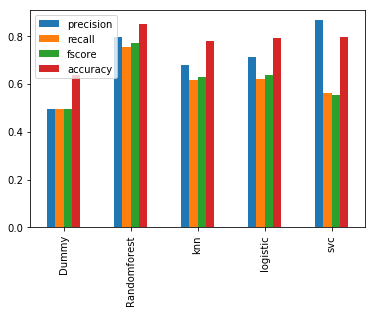

In [140]:
final.T.plot.bar()
plt.show()

### Preliminary conclusions on your models

Include some graphs and peformance metrics

## Part 4: Cross-validation
We really should have used k-fold (eg. k=5) crossvalidation here, to not only evaluate our five keras/tensorflow models. See how your preliminary results change. Now that we have validation results with uncertainy (+- standard deviation), do your prior conclusion change. 

In [111]:
# Part 4 inplement cross validation here
from sklearn.model_selection import cross_val_score

In [124]:
rd = RandomForestClassifier()
rd_val = cross_val_score(rd, Real_X_train, Real_y_train, cv=5, 
                       scoring='precision')


In [ ]:
rd_val.std

In [142]:
def model_one():
    testing = DummyClassifier()
    testing_pre = cross_val_score(testing, Real_X_train, Real_y_train, cv=5, scoring='precision').mean()
    testing_recall = cross_val_score(testing, Real_X_train, Real_y_train, cv=5, scoring='recall').mean()
    testing_fscore = cross_val_score(testing, Real_X_train, Real_y_train, cv=5, scoring='f1_macro').mean()
    testing_acc = cross_val_score(testing, Real_X_train, Real_y_train, cv=5, scoring='accuracy').mean()
    return [testing_pre, testing_recall, testing_fscore, testing_acc]

def model_two():
    knn = KNeighborsClassifier()
    testing_pre = cross_val_score(knn, Real_X_train, Real_y_train, cv=5, scoring='precision').mean()
    testing_recall = cross_val_score(knn, Real_X_train, Real_y_train, cv=5, scoring='recall').mean()
    testing_fscore = cross_val_score(knn, Real_X_train, Real_y_train, cv=5, scoring='f1_macro').mean()
    testing_acc = cross_val_score(knn, Real_X_train, Real_y_train, cv=5, scoring='accuracy').mean()
    return [testing_pre, testing_recall, testing_fscore, testing_acc]

def model_three():
    log = LogisticRegression()
    testing_pre = cross_val_score(log, Real_X_train, Real_y_train, cv=5, scoring='precision').mean()
    testing_recall = cross_val_score(log, Real_X_train, Real_y_train, cv=5, scoring='recall').mean()
    testing_fscore = cross_val_score(log, Real_X_train, Real_y_train, cv=5, scoring='f1_macro').mean()
    testing_acc = cross_val_score(log, Real_X_train, Real_y_train, cv=5, scoring='accuracy').mean()
    return [testing_pre, testing_recall, testing_fscore, testing_acc]

def model_four():
    svc = LinearSVC()
    testing_pre = cross_val_score(svc, Real_X_train, Real_y_train, cv=5, scoring='precision').mean()
    testing_recall = cross_val_score(svc, Real_X_train, Real_y_train, cv=5, scoring='recall').mean()
    testing_fscore = cross_val_score(svc, Real_X_train, Real_y_train, cv=5, scoring='f1_macro').mean()
    testing_acc = cross_val_score(svc, Real_X_train, Real_y_train, cv=5, scoring='accuracy').mean()
    return [testing_pre, testing_recall, testing_fscore, testing_acc]

def model_five():
    rd = RandomForestClassifier()
    testing_pre = cross_val_score(rd, Real_X_train, Real_y_train, cv=5, scoring='precision').mean()
    testing_recall = cross_val_score(rd, Real_X_train, Real_y_train, cv=5, scoring='recall').mean()
    testing_fscore = cross_val_score(rd, Real_X_train, Real_y_train, cv=5, scoring='f1_macro').mean()
    testing_acc = cross_val_score(rd, Real_X_train, Real_y_train, cv=5, scoring='accuracy').mean()
    return [testing_pre, testing_recall, testing_fscore, testing_acc]

In [143]:
lis_2 = ['Dummy', 'knn', 'logistic', 'svc', 'Randomforest']
lis_3 = [model_one(), model_two(), model_three(), model_four(), model_five()]
Final_1 = {}
for i in range(5):
    Final_1[lis_2[i]] = lis_3[i]

In [144]:
final_1 = pd.DataFrame(Final_1)
s = pd.Series(['precision', 'recall', 'fscore', 'accuracy'])
final_1.set_index(s, inplace=True)

In [145]:
final_1

,Dummy,Randomforest,knn,logistic,svc
precision,0.242136,0.726485,0.567016,0.670000,0.926410
recall,0.252370,0.580569,0.304302,0.291857,0.377515
fscore,0.502461,0.774982,0.628525,0.640318,0.473447
accuracy,0.634227,0.844659,0.774403,0.792926,0.711400


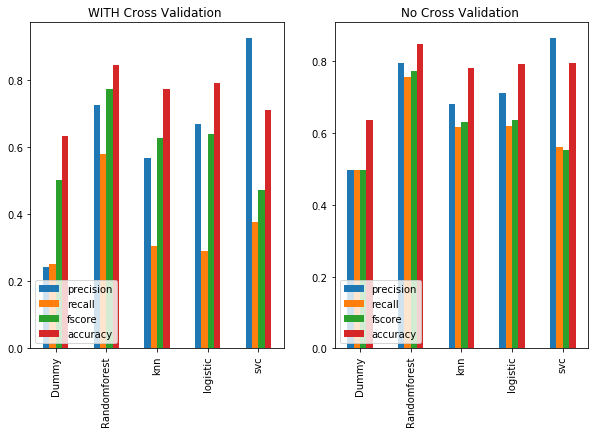

In [153]:
fig, ax = plt.subplots(1,2 , figsize=(10,6))
final_1.T.plot.bar(ax=ax[0])
ax[0].legend(loc='lower left')
ax[0].set_title('WITH Cross Validation ')
final.T.plot.bar(ax=ax[1])
ax[1].legend(loc='lower left')
ax[1].set_title('No Cross Validation ')
plt.show()

### Fill in your Part 4 Conclusion here 

Cross Validation gives results that is more usable because it gives average of set of accuracies, recall, precision and fscore. Over all random forest tend to do well and give better results. 

## Part 5: Refining with Regularization

We know that our biggest problem, if our models are flexibile enough, will be overfitting. Please try to regularize your best 2 models to see if you can improve their results. Not all algorithms have regularization but analyze two that do. Make sure you show graph performance has you change the regularization parameters.
Look at these questions:

* Try regularizing each of your two best models, does the generalizability increase?  of Decrease?  
* Is one more sensitive than the other? Why might this happen and why?  
* Please try this with all of your features and then with the reduced set of features.  
* Report your precision, recall and f1 score on the train and validation sets (no cross validatio yet).  
* Next carry out cross validation.  Does regularization reduce under or overfitting?   Why or why not?  

** Hint: Try both L1 or L2 norm for regularization or dropout **


In [157]:
def model_one():
    svc = LinearSVC(penalty='l1', dual=False)
    svc.fit(Real_X_train, Real_y_train)
    tes_y_pred = svc.predict(X_validate)
    precision, recall, fscore, support = precision_recall_fscore_support(y_validate, tes_y_pred, average='macro')
    accuracy = accuracy_score(y_validate, tes_y_pred)
    return [precision, recall, fscore, accuracy]

def model_two():
    svc = LinearSVC()
    svc.fit(Real_X_train, Real_y_train)
    tes_y_pred = svc.predict(X_validate)
    precision, recall, fscore, support = precision_recall_fscore_support(y_validate, tes_y_pred, average='macro')
    accuracy = accuracy_score(y_validate, tes_y_pred)
    return [precision, recall, fscore, accuracy]

def model_three():
    svc = LinearSVC(C=0.1)
    svc.fit(Real_X_train, Real_y_train)
    tes_y_pred = svc.predict(X_validate)
    precision, recall, fscore, support = precision_recall_fscore_support(y_validate, tes_y_pred, average='macro')
    accuracy = accuracy_score(y_validate, tes_y_pred)
    return [precision, recall, fscore, accuracy]

def model_four():
    svc = LinearSVC(penalty='l1', C=0.1, dual=False)
    svc.fit(Real_X_train, Real_y_train)
    tes_y_pred = svc.predict(X_validate)
    precision, recall, fscore, support = precision_recall_fscore_support(y_validate, tes_y_pred, average='macro')
    accuracy = accuracy_score(y_validate, tes_y_pred)
    return [precision, recall, fscore, accuracy]

def model_five():
    rd = RandomForestClassifier()
    rd.fit(Real_X_train, Real_y_train)
    tes_y_pred = rd.predict(X_validate)
    precision, recall, fscore, support = precision_recall_fscore_support(y_validate, tes_y_pred, average='macro')
    accuracy = accuracy_score(y_validate, tes_y_pred)
    return [precision, recall, fscore, accuracy]

def model_six():
    rd = RandomForestClassifier(min_samples_leaf=10)
    rd.fit(Real_X_train, Real_y_train)
    tes_y_pred = rd.predict(X_validate)
    precision, recall, fscore, support = precision_recall_fscore_support(y_validate, tes_y_pred, average='macro')
    accuracy = accuracy_score(y_validate, tes_y_pred)
    return [precision, recall, fscore, accuracy]

def model_seven():
    rd = RandomForestClassifier(min_samples_leaf=100)
    rd.fit(Real_X_train, Real_y_train)
    tes_y_pred = rd.predict(X_validate)
    precision, recall, fscore, support = precision_recall_fscore_support(y_validate, tes_y_pred, average='macro')
    accuracy = accuracy_score(y_validate, tes_y_pred)
    return [precision, recall, fscore, accuracy]

In [158]:
lis = ['svc_l1_C_1', 'svc_l1_C_0.1', 'svc_l2_C_1', 'svc_l2_C_0.1', 'Randomforest_leaf_1', 'Randomforest_leaf_10', 'Randomforest_leaf_100']
lis_1 = [model_one(), model_four(), model_two(), model_three(), model_five(), model_six(), model_seven()]
Final = {}
for i in range(7):
    Final[lis[i]] = lis_1[i]

In [159]:
final = pd.DataFrame(Final)
s = pd.Series(['precision', 'recall', 'fscore', 'accuracy'])
final.set_index(s, inplace=True)

In [160]:
final

,Randomforest_leaf_1,Randomforest_leaf_10,Randomforest_leaf_100,svc_l1_C_0.1,svc_l1_C_1,svc_l2_C_0.1,svc_l2_C_1
precision,0.786466,0.818726,0.820534,0.775262,0.775956,0.497520,0.858688
recall,0.747653,0.762284,0.728397,0.677347,0.676478,0.499530,0.571925
fscore,0.763652,0.784320,0.758256,0.703820,0.703088,0.219764,0.569424
accuracy,0.842802,0.859501,0.851056,0.823800,0.823800,0.249904,0.799808


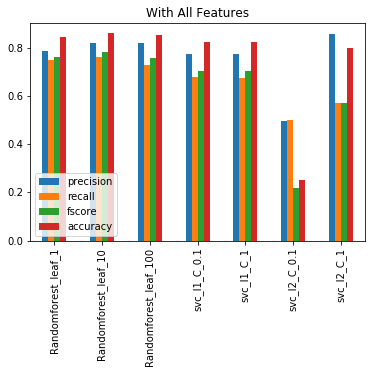

In [180]:
final.T.plot.bar()
plt.legend(loc='lower left')
plt.title('With All Features')
plt.show()

In [182]:
def model_one():
    svc = LinearSVC(penalty='l1', dual=False)
    svc.fit(Dropped_features, Real_y_train)
    tes_y_pred = svc.predict(Dropped_features_val)
    precision, recall, fscore, support = precision_recall_fscore_support(y_validate, tes_y_pred, average='macro')
    accuracy = accuracy_score(y_validate, tes_y_pred)
    return [precision, recall, fscore, accuracy]

def model_two():
    svc = LinearSVC()
    svc.fit(Dropped_features, Real_y_train)
    tes_y_pred = svc.predict(Dropped_features_val)
    precision, recall, fscore, support = precision_recall_fscore_support(y_validate, tes_y_pred, average='macro')
    accuracy = accuracy_score(y_validate, tes_y_pred)
    return [precision, recall, fscore, accuracy]

def model_three():
    svc = LinearSVC(C=0.1)
    svc.fit(Dropped_features, Real_y_train)
    tes_y_pred = svc.predict(Dropped_features_val)
    precision, recall, fscore, support = precision_recall_fscore_support(y_validate, tes_y_pred, average='macro')
    accuracy = accuracy_score(y_validate, tes_y_pred)
    return [precision, recall, fscore, accuracy]

def model_four():
    svc = LinearSVC(penalty='l1', C=0.1, dual=False)
    svc.fit(Dropped_features, Real_y_train)
    tes_y_pred = svc.predict(Dropped_features_val)
    precision, recall, fscore, support = precision_recall_fscore_support(y_validate, tes_y_pred, average='macro')
    accuracy = accuracy_score(y_validate, tes_y_pred)
    return [precision, recall, fscore, accuracy]

def model_five():
    rd = RandomForestClassifier()
    rd.fit(Dropped_features, Real_y_train)
    tes_y_pred = rd.predict(Dropped_features_val)
    precision, recall, fscore, support = precision_recall_fscore_support(y_validate, tes_y_pred, average='macro')
    accuracy = accuracy_score(y_validate, tes_y_pred)
    return [precision, recall, fscore, accuracy]

def model_six():
    rd = RandomForestClassifier(min_samples_leaf=10)
    rd.fit(Dropped_features, Real_y_train)
    tes_y_pred = rd.predict(Dropped_features_val)
    precision, recall, fscore, support = precision_recall_fscore_support(y_validate, tes_y_pred, average='macro')
    accuracy = accuracy_score(y_validate, tes_y_pred)
    return [precision, recall, fscore, accuracy]

def model_seven():
    rd = RandomForestClassifier(min_samples_leaf=100)
    rd.fit(Dropped_features, Real_y_train)
    tes_y_pred = rd.predict(Dropped_features_val)
    precision, recall, fscore, support = precision_recall_fscore_support(y_validate, tes_y_pred, average='macro')
    accuracy = accuracy_score(y_validate, tes_y_pred)
    return [precision, recall, fscore, accuracy]

In [183]:
lis = ['svc_l1_C_1', 'svc_l1_C_0.1', 'svc_l2_C_1', 'svc_l2_C_0.1', 'Randomforest_leaf_1', 'Randomforest_leaf_10', 'Randomforest_leaf_100']
lis_1 = [model_one(), model_four(), model_two(), model_three(), model_five(), model_six(), model_seven()]
Final_10 = {}
for i in range(7):
    Final_10[lis[i]] = lis_1[i]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [184]:
final_10 = pd.DataFrame(Final_10)
s = pd.Series(['precision', 'recall', 'fscore', 'accuracy'])
final_10.set_index(s, inplace=True)

In [185]:
final_10

,Randomforest_leaf_1,Randomforest_leaf_10,Randomforest_leaf_100,svc_l1_C_0.1,svc_l1_C_1,svc_l2_C_0.1,svc_l2_C_1
precision,0.745309,0.767044,0.771091,0.748468,0.747076,0.741583,0.384261
recall,0.722688,0.731219,0.709236,0.654120,0.653455,0.651792,0.500000
fscore,0.732545,0.745930,0.730948,0.677241,0.676397,0.674033,0.434556
accuracy,0.818234,0.830902,0.829175,0.810365,0.809789,0.807678,0.768522


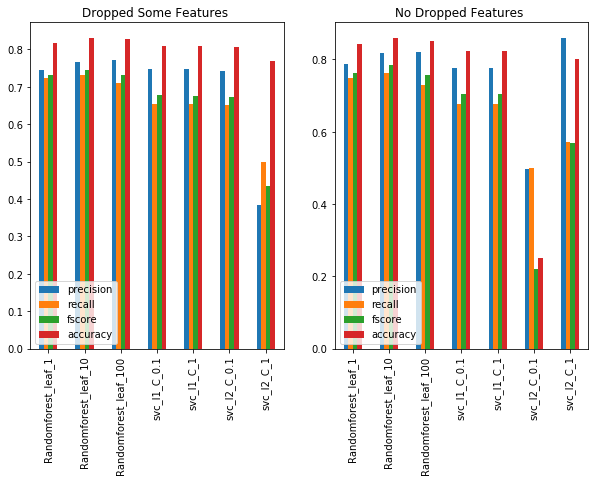

In [186]:
fig, ax = plt.subplots(1,2 , figsize=(10,6))
final_10.T.plot.bar(ax=ax[0])
ax[0].legend(loc='lower left')
ax[0].set_title('Dropped Some Features ')
final.T.plot.bar(ax=ax[1])
ax[1].legend(loc='lower left')
ax[1].set_title('No Dropped Features ')
plt.show()

In [187]:
def model_eight():
    svc = LinearSVC(penalty='l1', C=0.1, dual=False)
    testing_pre = cross_val_score(svc, Real_X_train, Real_y_train, cv=5, scoring='precision').mean()
    testing_recall = cross_val_score(svc, Real_X_train, Real_y_train, cv=5, scoring='recall').mean()
    testing_fscore = cross_val_score(svc, Real_X_train, Real_y_train, cv=5, scoring='f1_macro').mean()
    testing_acc = cross_val_score(svc, Real_X_train, Real_y_train, cv=5, scoring='accuracy').mean()
    return [testing_pre, testing_recall, testing_fscore, testing_acc]

def model_nine():
    rd = RandomForestClassifier(min_samples_leaf=10)
    testing_pre = cross_val_score(rd, Real_X_train, Real_y_train, cv=5, scoring='precision').mean()
    testing_recall = cross_val_score(rd, Real_X_train, Real_y_train, cv=5, scoring='recall').mean()
    testing_fscore = cross_val_score(rd, Real_X_train, Real_y_train, cv=5, scoring='f1_macro').mean()
    testing_acc = cross_val_score(rd, Real_X_train, Real_y_train, cv=5, scoring='accuracy').mean()
    return [testing_pre, testing_recall, testing_fscore, testing_acc]

In [188]:
lis_2 = ['best_svc_C_0.1_L1', 'Randomforest_leaf_10']
lis_3 = [model_eight(), model_nine()]
Final_val_1 = {}
for i in range(2):
    Final_val_1[lis_2[i]] = lis_3[i]

In [189]:
final_val = pd.DataFrame(Final_val_1)
s = pd.Series(['precision', 'recall', 'fscore', 'accuracy'])
final_val.set_index(s, inplace=True)

In [190]:
final_val

,Randomforest_leaf_10,best_svc_C_0.1_L1
precision,0.768012,0.753171
recall,0.601897,0.394536
fscore,0.791890,0.708347
accuracy,0.856752,0.821959


### Fill in your part 5 conclusions here
 
With the regularization parameters set; over all, overfitting tend to decrease as we see better performance on the test set. Thus, generalizability increases. 

In Random forest model, I found that min_leaf_size of 10 tend to reduce model complexity and yield better results on test set. SVC is very sensitive when changed from C=1 to C=0.1 for "L2" PENALTY as we can see above in the graph. This is because there is a level of tolerance the model can accept, as C gets lower, it collapses some of the features.

Regularization reduces overfitting because its dealing with the variances which might be inconsistent with different training set. 

## Overall Conclusion

This problem is very interesting because it has many features which can be investigated further. All the models tend to do very well better than the dummy one. Overall, Random forest gives better score in terms of precision, recall and accuracy for the test score. Support vector classifier is the second best in line. 

Applying regularization, reduces the impact of overfitting; thus, reducing the complexity of the models caused the scores (recall, precision, f1 and accuracy) to be similar for both the traning set and test set. I will not anticipate any form of underfitting because scores for both training and validation set were between 0.7 and 0.8 roughly. 

Incorporating hyperparameters would have even caused the models to produce better results as they would be finely tuned. In general, upon recieving data, one should investigate the data closely by doing EDA (Exploratory Data Analysis). Upon close analyis, one can take care of missing data. If there are too many missing data in a column, one can drop that column completely; likewise, if there are too many missing data in a row, that row could be dropped. Filling in missing data really depends on the situation because one can fill in with the median if the data is ordinal. If data is categorical, one can fill missing data there with the mode. Even further, the mean could be utilized in most cases when there are not major outliers and data seem to be normally distributed. 

In this particular problem, the major features that should be used include: "age", "work_class", "education", "education_num", "marital_status", "occupation", "race" and "hours_per_week". Some of this features are correlated with target and produce better scores. One problem among the features that could be pointed out is the fact that education and education_num could be repeated features because they could both be saying the same thing about education. 

Over all this exercise is good first practice to implement machine learning models on our data and for us to begin to grasp the concept of missing data, feature selection as well as overfitting and underfitting. 